# Read in netcdfs, and plot results

In [79]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration
import seaborn as sns

In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

## Open datasets of means and percentiles for plotting

In [3]:
path = '/g/data/w48/kb6999/20CR_data_for_plots/'

In [34]:
# open lat lon mean of temperature 
llm_Glob = xr.open_dataset(f'{path}llm_mon_Glob.nc')
llm_NH = xr.open_dataset(f'{path}llm_mon_NH.nc')
llm_SH = xr.open_dataset(f'{path}llm_mon_SH.nc')
llm_Aus = xr.open_dataset(f'{path}llm_mon_Aus.nc')
llm_EA = xr.open_dataset(f'{path}llm_mon_EA.nc')

In [4]:
# open multi member mean of temperature
mmm_mon_Glob = xr.open_dataset(f'{path}mmm_mon_Glob.nc')
mmm_mon_NH = xr.open_dataset(f'{path}mmm_mon_NH.nc')
mmm_mon_SH = xr.open_dataset(f'{path}mmm_mon_SH.nc')
mmm_mon_Aus = xr.open_dataset(f'{path}mmm_mon_Aus.nc')
mmm_mon_EA = xr.open_dataset(f'{path}mmm_mon_EA.nc')

In [5]:
# open percentile data for temperature
p10_mon_Glob = xr.open_dataset(f'{path}p10_mon_Glob.nc')
p10_mon_NH = xr.open_dataset(f'{path}p10_mon_NH.nc')
p10_mon_SH = xr.open_dataset(f'{path}p10_mon_SH.nc')
p10_mon_Aus = xr.open_dataset(f'{path}p10_mon_Aus.nc')
p10_mon_EA = xr.open_dataset(f'{path}p10_mon_EA.nc')

In [8]:
# open percentile data for temperature
p90_mon_Glob = xr.open_dataset(f'{path}p90_mon_Glob.nc')
p90_mon_NH = xr.open_dataset(f'{path}p90_mon_NH.nc')
p90_mon_SH = xr.open_dataset(f'{path}p90_mon_SH.nc')
p90_mon_Aus = xr.open_dataset(f'{path}p90_mon_Aus.nc')
p90_mon_EA = xr.open_dataset(f'{path}p90_mon_EA.nc')

### select out Krakatoa years 

In [19]:
# eruption date
e_date = pd.to_datetime(['1883-08','1902-10', '1963-03', '1982-04', '1991-06'])

In [20]:
# save arrays of times relative to each eruption
e_pre5yrs = e_date - 60 * pd.offsets.MonthBegin()
e_pre3mon = e_date - 3 * pd.offsets.MonthBegin()
e_post5yrs = e_date + 61 * pd.offsets.MonthBegin()
e_post10yrs = e_date + 121 * pd.offsets.MonthBegin()

In [21]:
# Zoom in on Krakatoa time period
K_mmm_Glob = mmm_mon_Glob.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_SH = mmm_mon_SH.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_Aus = mmm_mon_Aus.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_EA = mmm_mon_EA.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

K_p10_Glob = p10_mon_Glob.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_SH = p10_mon_SH.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_Aus = p10_mon_Aus.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_EA = p10_mon_EA.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

K_p90_Glob = p90_mon_Glob.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_SH = p90_mon_SH.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_Aus = p90_mon_Aus.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_EA = p90_mon_EA.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

## Figures

In [16]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

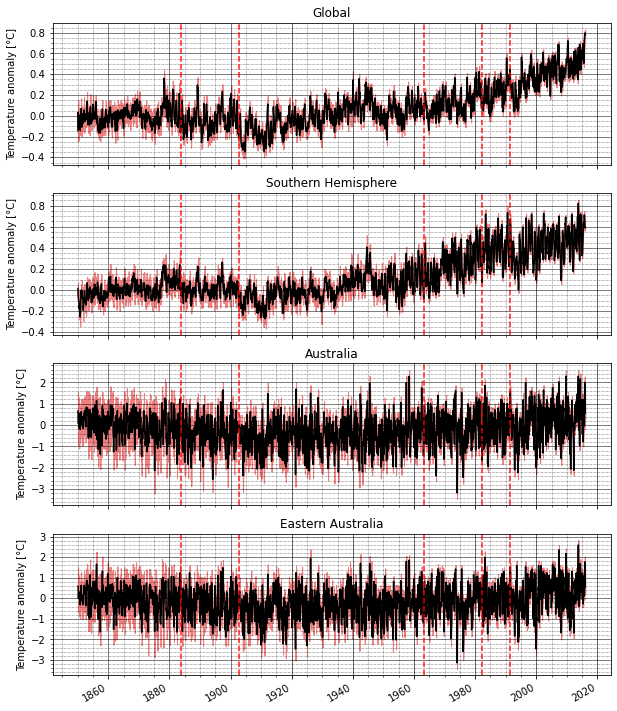

In [33]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10,12)) # make a figure

with dask.diagnostics.ProgressBar():
    fplot.timeseries_graph(mmm_mon_Glob.tmp, p10_mon_Glob.tmp, p90_mon_Glob.tmp, ax = axes[0], color='lightcoral')
    fplot.timeseries_graph(mmm_mon_SH.tmp, p10_mon_SH.tmp, p90_mon_SH.tmp, ax = axes[1], color='lightcoral')
    fplot.timeseries_graph(mmm_mon_Aus.tmp, p10_mon_Aus.tmp, p90_mon_Aus.tmp, ax = axes[2], color='lightcoral')
    fplot.timeseries_graph(mmm_mon_EA.tmp, p10_mon_EA.tmp, p90_mon_EA.tmp, ax = axes[3], color='lightcoral')

axes[0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[1].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Southern Hemisphere')
axes[2].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[3].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Eastern Australia')

#fig.suptitle('Time series of temperature anomalies', size=16)

#fig.tight_layout() # makes titles overlap, but is meant to stops things from overlapping and makes the figure more compact

plt.savefig('R_timeseries_mon_tmp_stacked.png', dpi=300, bbox_inches='tight')

In [24]:
# use this to set the x-ticks for each month from 5 years before to 5 years after the eruption
months = pd.date_range(e_pre5yrs[0], e_post5yrs[0], freq='MS')
years = pd.date_range(e_pre5yrs[0], e_post5yrs[0], freq='YS')

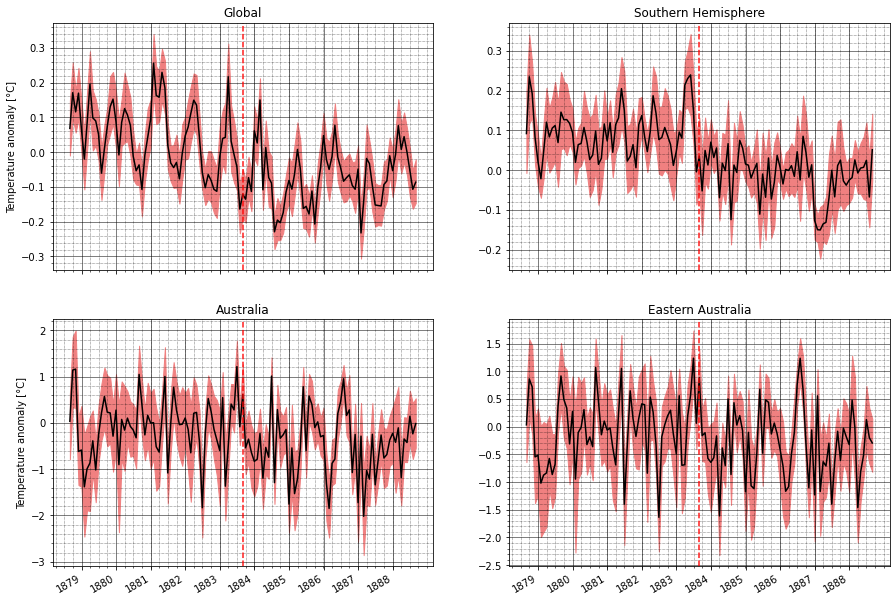

In [25]:
# Monthly precipitation anomalies for Krakatoa
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10)) # make a figure

# make subplots for each region
fplot.timeseries_graph(K_mmm_Glob.tmp, K_p10_Glob.tmp, K_p90_Glob.tmp, ax = axes[0,0], color='lightcoral')
fplot.timeseries_graph(K_mmm_SH.tmp, K_p10_SH.tmp, K_p90_SH.tmp, ax = axes[0,1], color='lightcoral')
fplot.timeseries_graph(K_mmm_Aus.tmp, K_p10_Aus.tmp, K_p90_Aus.tmp, ax = axes[1,0], color='lightcoral')
fplot.timeseries_graph(K_mmm_EA.tmp, K_p10_EA.tmp, K_p90_EA.tmp, ax = axes[1,1], color='lightcoral')

# set axis labels and subplot titles
axes[0,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[1,1].set(title = 'Eastern Australia')

# set the axis ticks to be monthly 
axes[0,0].set_xticks(years)
axes[0,0].set_xticklabels(years.year) # .year displays only the year (not month time etc)

plt.savefig('R_K_timeseries_mon_tmp.png', dpi=300, bbox_inches='tight')

## Analysis using Rolling mean 

In [35]:
# calculate rolling means of lat lon data
llm_mon_Glob_roll = llm_Glob.rolling(time=6).mean()
llm_mon_NH_roll = llm_NH.rolling(time=6).mean()
llm_mon_SH_roll = llm_SH.rolling(time=6).mean()
llm_mon_Aus_roll = llm_Aus.rolling(time=6).mean()
llm_mon_EA_roll = llm_EA.rolling(time=6).mean()

In [37]:
# calculate the percentiles and then take the mean along the model dimension for monthly anomalies
p10_mon_Glob_roll = llm_Glob.chunk({'member': -1}).quantile(0.1, dim=['member'])
p10_mon_NH_roll = llm_NH.chunk({'member': -1}).quantile(0.1, dim=['member'])
p10_mon_SH_roll = llm_SH.chunk({'member': -1}).quantile(0.1, dim=['member'])
p10_mon_Aus_roll = llm_Aus.chunk({'member': -1}).quantile(0.1, dim=['member'])
p10_mon_EA_roll = llm_EA.chunk({'member': -1}).quantile(0.1, dim=['member'])
# calculate the percentiles and then take the mean along the model dimension for monthly anomalies
p90_mon_Glob_roll = llm_Glob.chunk({'member': -1}).quantile(0.9, dim=['member'])
p90_mon_NH_roll = llm_NH.chunk({'member': -1}).quantile(0.1, dim=['member'])
p90_mon_SH_roll = llm_SH.chunk({'member': -1}).quantile(0.9, dim=['member'])
p90_mon_Aus_roll = llm_Aus.chunk({'member': -1}).quantile(0.9, dim=['member'])
p90_mon_EA_roll = llm_EA.chunk({'member': -1}).quantile(0.9, dim=['member'])

In [14]:
# calculate rolling means
mmm_mon_Glob_roll = mmm_mon_Glob.rolling(time=6).mean()
mmm_mon_NH_roll = mmm_mon_NH.rolling(time=6).mean()
mmm_mon_SH_roll = mmm_mon_SH.rolling(time=6).mean()
mmm_mon_Aus_roll = mmm_mon_Aus.rolling(time=6).mean()
mmm_mon_EA_roll = mmm_mon_EA.rolling(time=6).mean()

In [48]:
mmm = llm_mon_Glob_roll.mean(dim='member')

In [38]:
# calculate rolling means
p10_mon_Glob_roll = p10_mon_Glob.rolling(time=6).mean()
p10_mon_NH_roll = p10_mon_NH.rolling(time=6).mean()
p10_mon_SH_roll = p10_mon_SH.rolling(time=6).mean()
p10_mon_Aus_roll = p10_mon_Aus.rolling(time=6).mean()
p10_mon_EA_roll = p10_mon_EA.rolling(time=6).mean()

In [11]:
# calculate rolling means
p90_mon_Glob_roll = p90_mon_Glob.rolling(time=6).mean()
p90_mon_NH_roll = p90_mon_NH.rolling(time=6).mean()
p90_mon_SH_roll = p90_mon_SH.rolling(time=6).mean()
p90_mon_Aus_roll = p90_mon_Aus.rolling(time=6).mean()
p90_mon_EA_roll = p90_mon_EA.rolling(time=6).mean()

In [54]:
mmm_mon_Glob_roll3 = mmm_mon_Glob.rolling(time=3).mean()
mmm_mon_Aus_roll3 = mmm_mon_Aus.rolling(time=3).mean()
p10_mon_Glob_roll3 = p10_mon_Glob.rolling(time=3).mean()
p10_mon_Aus_roll3 = p10_mon_Aus.rolling(time=3).mean()
p90_mon_Glob_roll3 = p90_mon_Glob.rolling(time=3).mean()
p90_mon_Aus_roll3 = p90_mon_Aus.rolling(time=3).mean()

mmm_mon_Glob_roll12 = mmm_mon_Glob.rolling(time=12).mean()
mmm_mon_Aus_roll12 = mmm_mon_Aus.rolling(time=12).mean()
p10_mon_Glob_roll12 = p10_mon_Glob.rolling(time=12).mean()
p10_mon_Aus_roll12 = p10_mon_Aus.rolling(time=12).mean()
p90_mon_Glob_roll12 = p90_mon_Glob.rolling(time=12).mean()
p90_mon_Aus_roll12 = p90_mon_Aus.rolling(time=12).mean()

mmm_mon_Glob_roll24 = mmm_mon_Glob.rolling(time=24).mean()
mmm_mon_Aus_roll24 = mmm_mon_Aus.rolling(time=24).mean()
p10_mon_Glob_roll24 = p10_mon_Glob.rolling(time=24).mean()
p10_mon_Aus_roll24 = p10_mon_Aus.rolling(time=24).mean()
p90_mon_Glob_roll24 = p90_mon_Glob.rolling(time=24).mean()
p90_mon_Aus_roll24 = p90_mon_Aus.rolling(time=24).mean()


## Rolling mean

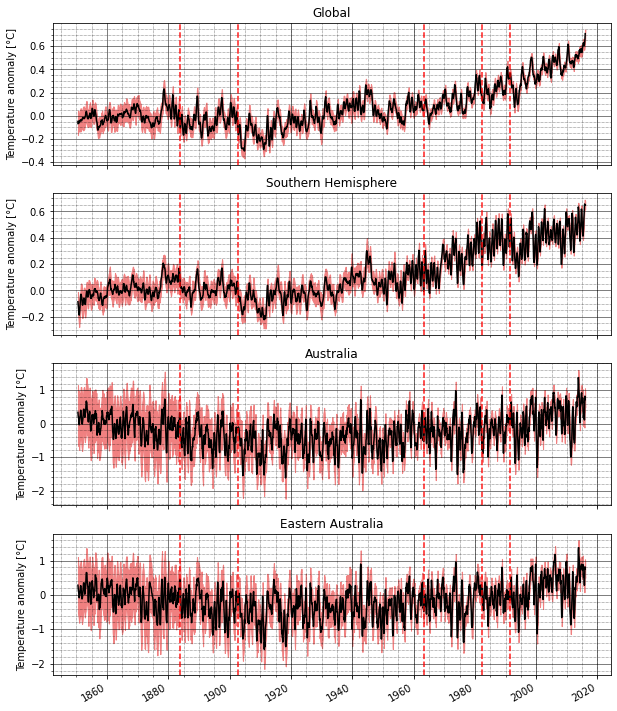

In [17]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10,12)) # make a figure

with dask.diagnostics.ProgressBar():
    fplot.timeseries_graph(mmm_mon_Glob_roll.tmp, p10_mon_Glob_roll.tmp, p90_mon_Glob_roll.tmp, ax = axes[0], color='lightcoral')
    fplot.timeseries_graph(mmm_mon_SH_roll.tmp, p10_mon_SH_roll.tmp, p90_mon_SH_roll.tmp, ax = axes[1], color='lightcoral')
    fplot.timeseries_graph(mmm_mon_Aus_roll.tmp, p10_mon_Aus_roll.tmp, p90_mon_Aus_roll.tmp, ax = axes[2], color='lightcoral')
    fplot.timeseries_graph(mmm_mon_EA_roll.tmp, p10_mon_EA_roll.tmp, p90_mon_EA_roll.tmp, ax = axes[3], color='lightcoral')

axes[0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[1].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Southern Hemisphere')
axes[2].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[3].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Eastern Australia')

#fig.suptitle('Time series of temperature anomalies', size=16)

#fig.tight_layout() # makes titles overlap, but is meant to stops things from overlapping and makes the figure more compact

plt.savefig('R_timeseries_mon_tmp_rolling.png', dpi=300, bbox_inches='tight')

In [23]:
# rolling mean version
K_mmm_Glob_roll = mmm_mon_Glob_roll.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_SH_roll = mmm_mon_SH_roll.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_Aus_roll = mmm_mon_Aus_roll.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_EA_roll = mmm_mon_EA_roll.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

K_p10_Glob_roll = p10_mon_Glob_roll.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_SH_roll = p10_mon_SH_roll.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_Aus_roll = p10_mon_Aus_roll.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_EA_roll = p10_mon_EA_roll.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

K_p90_Glob_roll = p90_mon_Glob_roll.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_SH_roll = p90_mon_SH_roll.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_Aus_roll = p90_mon_Aus_roll.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_EA_roll = p90_mon_EA_roll.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

In [55]:
K_mmm_Glob_roll3 = mmm_mon_Glob_roll3.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_Aus_roll3 = mmm_mon_Aus_roll3.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_Glob_roll3 = p10_mon_Glob_roll3.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_Aus_roll3 = p10_mon_Aus_roll3.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_Glob_roll3 = p90_mon_Glob_roll3.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_Aus_roll3 = p90_mon_Aus_roll3.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

K_mmm_Glob_roll12 = mmm_mon_Glob_roll12.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_Aus_roll12 = mmm_mon_Aus_roll12.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_Glob_roll12 = p10_mon_Glob_roll12.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_Aus_roll12 = p10_mon_Aus_roll12.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_Glob_roll12 = p90_mon_Glob_roll12.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_Aus_roll12 = p90_mon_Aus_roll12.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))

K_mmm_Glob_roll24 = mmm_mon_Glob_roll24.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_mmm_Aus_roll24 = mmm_mon_Aus_roll24.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_Glob_roll24 = p10_mon_Glob_roll24.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p10_Aus_roll24 = p10_mon_Aus_roll24.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_Glob_roll24 = p90_mon_Glob_roll24.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
K_p90_Aus_roll24 = p90_mon_Aus_roll24.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))


In [60]:
mon_array = [1, 3, 6, 12, 24]

### function below not working, roll should just be a simple 1d array (like mon_array above) but instead it's an xarray

In [122]:
# function to calculate the rolling mean of an array, 
# it can calculate rolling means using different time periods specified in the array 'mon_array' and concat them into one array

def roll_array(ds, mon_array):
    ds_roll=[]
    for m in mon_array: 
        roll = ds.rolling(time=m).mean()
        ds_roll.append(roll)

    # store all roolling means in an array
    roll_array = xr.concat(ds_roll, dim='roll', coords = 'minimal')
    roll_array.coords['roll'] = ['1','3','6','12','24']
    
    return roll_array

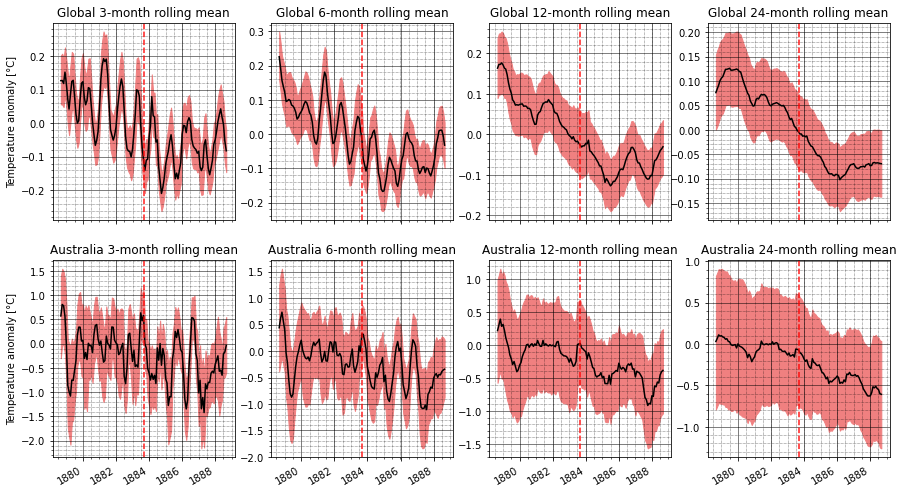

In [58]:
# Monthly precipitation anomalies for Krakatoa
fig, axes = plt.subplots(2, 4, sharex=True, figsize=(15,8)) # make a figure

# make subplots for each region
fplot.timeseries_graph(K_mmm_Glob_roll3.tmp, K_p10_Glob_roll3.tmp, K_p90_Glob_roll3.tmp, ax = axes[0,0], color='lightcoral')
fplot.timeseries_graph(K_mmm_Glob_roll.tmp, K_p10_Glob_roll.tmp, K_p90_Glob_roll.tmp, ax = axes[0,1], color='lightcoral')
fplot.timeseries_graph(K_mmm_Glob_roll12.tmp, K_p10_Glob_roll12.tmp, K_p90_Glob_roll12.tmp, ax = axes[0,2], color='lightcoral')
fplot.timeseries_graph(K_mmm_Glob_roll24.tmp, K_p10_Glob_roll24.tmp, K_p90_Glob_roll24.tmp, ax = axes[0,3], color='lightcoral')
fplot.timeseries_graph(K_mmm_Aus_roll3.tmp, K_p10_Aus_roll3.tmp, K_p90_Aus_roll3.tmp, ax = axes[1,0], color='lightcoral')
fplot.timeseries_graph(K_mmm_Aus_roll.tmp, K_p10_Aus_roll.tmp, K_p90_Aus_roll.tmp, ax = axes[1,1], color='lightcoral')
fplot.timeseries_graph(K_mmm_Aus_roll12.tmp, K_p10_Aus_roll12.tmp, K_p90_Aus_roll12.tmp, ax = axes[1,2], color='lightcoral')
fplot.timeseries_graph(K_mmm_Aus_roll24.tmp, K_p10_Aus_roll24.tmp, K_p90_Aus_roll24.tmp, ax = axes[1,3], color='lightcoral')

# set axis labels and subplot titles
axes[0,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global 3-month rolling mean') 
axes[0,1].set(title = 'Global 6-month rolling mean')
axes[0,2].set(title = 'Global 12-month rolling mean')
axes[0,3].set(title = 'Global 24-month rolling mean')
axes[1,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia 3-month rolling mean')
axes[1,1].set(title = 'Australia 6-month rolling mean')
axes[1,2].set(title = 'Australia 12-month rolling mean')
axes[1,3].set(title = 'Australia 24-month rolling mean')



# set the axis ticks to be monthly 
# axes[0,0].set_xticks(years)
# axes[0,0].set_xticklabels(years.year) # .year displays only the year (not month time etc)

plt.savefig('R_K_timeseries_mon_tmp_rolling3-6-12-24.png', dpi=300, bbox_inches='tight')

In [125]:
Glob_roll = roll_array(mmm_mon_Glob, mon_array)
for r in Glob_roll.roll:
    print(hey)

TypeError: 'method' object is not iterable

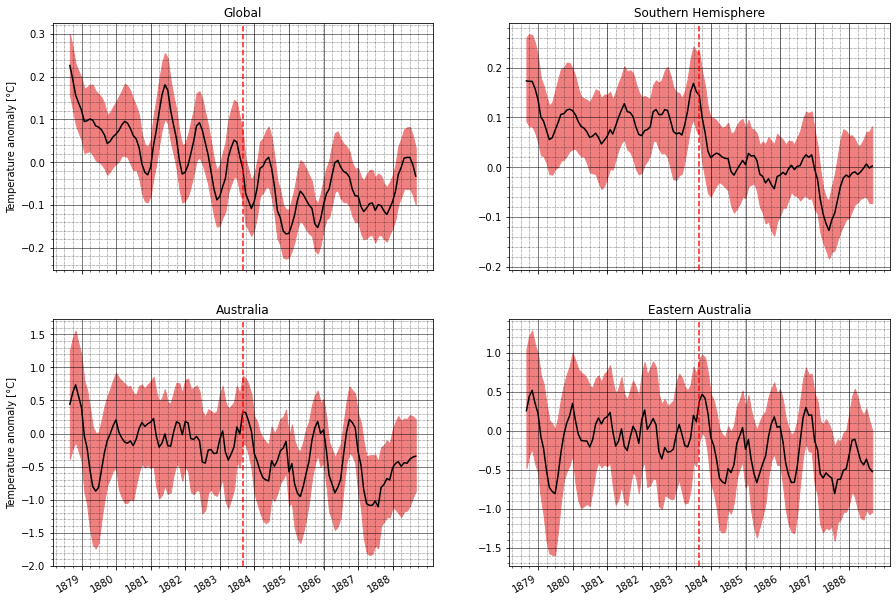

In [26]:
# Monthly precipitation anomalies for Krakatoa
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10)) # make a figure

# make subplots for each region
fplot.timeseries_graph(K_mmm_Glob_roll.tmp, K_p10_Glob_roll.tmp, K_p90_Glob_roll.tmp, ax = axes[0,0], color='lightcoral')
fplot.timeseries_graph(K_mmm_SH_roll.tmp, K_p10_SH_roll.tmp, K_p90_SH_roll.tmp, ax = axes[0,1], color='lightcoral')
fplot.timeseries_graph(K_mmm_Aus_roll.tmp, K_p10_Aus_roll.tmp, K_p90_Aus_roll.tmp, ax = axes[1,0], color='lightcoral')
fplot.timeseries_graph(K_mmm_EA_roll.tmp, K_p10_EA_roll.tmp, K_p90_EA_roll.tmp, ax = axes[1,1], color='lightcoral')

# set axis labels and subplot titles
axes[0,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(ylabel= f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[1,1].set(title = 'Eastern Australia')

# set the axis ticks to be monthly 
axes[0,0].set_xticks(years)
axes[0,0].set_xticklabels(years.year) # .year displays only the year (not month time etc)

plt.savefig('R_K_timeseries_mon_tmp_rolling.png', dpi=300, bbox_inches='tight')

## rolling means

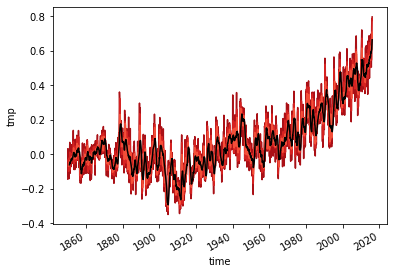

In [145]:
# plot monthly anomalies of temperature as a superposed epoch analysis of all 5 eruptions plus composite
fig, ax = plt.subplots(1)

mmm_mon_Glob.tmp.plot(ax=ax, label = 1, color = reds[0]) # plot the anomalies 
mmm_mon_Glob_roll3.tmp.plot(ax=ax, label = 3, color = reds[1]) # plot the anomalies 
mmm_mon_Glob_roll.tmp.plot(ax=ax, label = 6, color = reds[2]) # plot the anomalies 
# mmm_mon_Glob_roll12.tmp.plot(ax=ax, label = 12, color = reds[3]) # plot the anomalies 

#ax.fill_between(p10.time.data, p10.data, p90.data, color='lightgrey')
mmm_mon_Glob_roll12.tmp.plot(color = 'k', ax=ax, label = '24') 

# plt.savefig('R_SEA_mon_tmp_roll6.png', dpi=300, bbox_inches='tight')

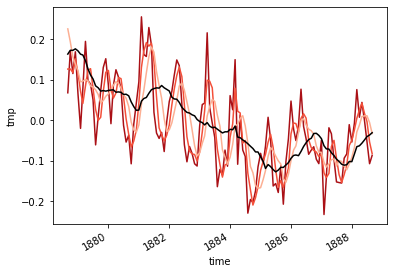

In [155]:
# plot monthly anomalies of temperature as a superposed epoch analysis of all 5 eruptions plus composite
fig, ax = plt.subplots(1)

K_mmm_Glob.tmp.plot(ax=ax, label = 1, color = reds[0]) # plot the anomalies 
K_mmm_Glob_roll3.tmp.plot(ax=ax, label = 3, color = reds[2]) # plot the anomalies 
K_mmm_Glob_roll.tmp.plot(ax=ax, label = 6, color = reds[4]) # plot the anomalies 

#ax.fill_between(p10.time.data, p10.data, p90.data, color='lightgrey')
K_mmm_Glob_roll12.tmp.plot(color = 'k', ax=ax, label = '24') 

# plt.savefig('R_SEA_mon_tmp_roll6.png', dpi=300, bbox_inches='tight')

In [97]:
# define function to plot figures for composite graphs 
def rolling_plots(mmm_roll_dataset, p10 = None, p90 = None, color_cycle = None, ax = None, **plt_kwargs):

    import xarray as xr, matplotlib.pyplot as plt, numpy as np, seaborn as sns
    
    # checking if an axis has been defined and if not creates one with function "get current axes"
    if ax is None:
        ax = plt.gca()  
    
    # SUBPLOT 1
    i=0
    # loop over all eruptions and plot the seasonal anomalies on one graph
    for r in mmm_roll_dataset.roll:
        mmm_roll_dataset.sel(roll=r).plot(ax=ax, label = r, color = color_cycle[i]) # plot the anomalies 
        i = i+1
    
    if p10 is not None:
        ax.fill_between(p10.time.data, p10.data, p90.data, color='lightgrey')

    #comp_dataset.plot(color = 'k', ax=ax, label = 'Composite') 

    ax.set_facecolor('white')
    ax.legend(loc="upper left")
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
    ax.minorticks_on() # need this line in order to get the minor grid lines 
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    # set's axis ticks to every 12 months 
    ax.set_xticks(np.arange(min(mmm_dataset.time), max(mmm_dataset.time)+1, 12))
    
    # set lables
    ax.set_xlabel(None) 
    ax.set_ylabel(None)
    
    return ax

In [80]:
greens = sns.color_palette("Greens_r")
reds = sns.color_palette("Reds_r")

In [119]:
i=0
for r, vals in enumerate(Glob_roll.roll):
    print(r)
    Glob_roll.tmp.sel(roll=r).plot(ax=ax, label = r, color = color_cycle[i]) # plot the anomalies 
    i = i+1

TypeError: 'method' object is not iterable

In [110]:
Glob_roll.tmp.sel(roll=3)

<xarray.DataArray 'tmp' (time: 1992)>
array([        nan,         nan, -0.03704424, ...,  0.72395295,
        0.7680644 ,  0.7870958 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2015-12-31
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
    roll     int64 3

TypeError: 'method' object is not iterable

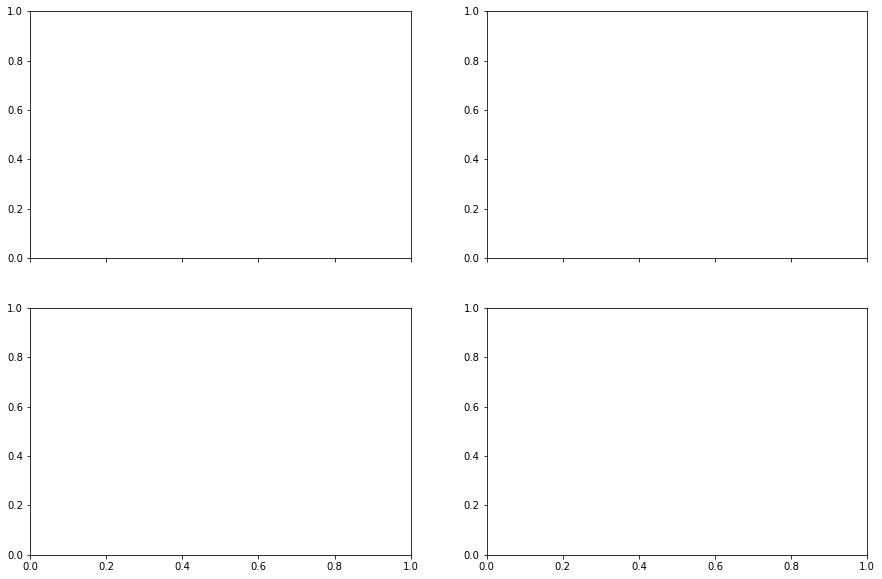

In [101]:
# plot monthly anomalies of temperature as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10))

# make subplots for each region
rolling_plots(Glob_roll.tmp, p10_mon_Glob.tmp, p90_mon_Glob.tmp, reds, ax = axes[0,0])
# fplot.SEA_plots(composite_mmm_SH.tmp, V_composite_mmm_SH.tmp, p10_SH.tmp, p90_SH.tmp, reds, ax = axes[0,1])
# fplot.SEA_plots(composite_mmm_Aus.tmp, V_composite_mmm_Aus.tmp, p10_Aus.tmp, p90_Aus.tmp, reds, ax = axes[1,0])
# fplot.SEA_plots(composite_mmm_EA.tmp, V_composite_mmm_EA.tmp, p10_EA.tmp, p90_EA.tmp, reds, ax = axes[1,1])

# set axis labels and subplot titles
axes[0,0].set(ylabel = f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(xlabel = 'Month relative to eruption', ylabel = f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[1,1].set(xlabel = 'Month relative to eruption', title = 'Eastern Australia')

#fig.suptitle('Superposed epoch analysis of temperature anomalies for 5 major eruptions', size=16)

#fig.tight_layout() # if I include this line then titles overlap

# plt.savefig('R_SEA_mon_tmp_roll6.png', dpi=300, bbox_inches='tight')